In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from pathlib import Path

In [2]:
CURRENT_DIR = Path("__file__").parent.resolve()
DATA_DIR = CURRENT_DIR.parent / "encoded_cleaned.csv"

In [3]:
sns.set_theme()

In [4]:
df = pd.read_csv(DATA_DIR, parse_dates=["Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     2041 non-null   int64         
 1   Date                           2041 non-null   datetime64[ns]
 2   Site                           2041 non-null   object        
 3   Staff Reported Positive Tests  2041 non-null   int64         
 4   # of Currently Positive Staff  2041 non-null   int64         
 5    Staff Deaths                  2041 non-null   int64         
 6   Staff Recovered                2041 non-null   int64         
 7   Housing type                   2041 non-null   object        
 8   Isolation Inmates              2041 non-null   int64         
 9   Positive Inmates               2041 non-null   int64         
 10  Confirmed Inmate Deaths        2041 non-null   int64         
 11  Pending Results  

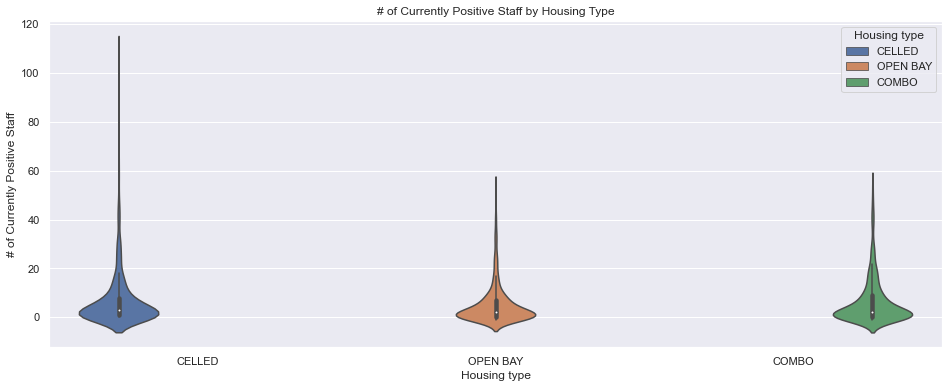

In [6]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="Housing type", y="# of Currently Positive Staff", hue="Housing type", data=df)
plt.title("# of Currently Positive Staff by Housing Type")

fig = ax.get_figure()
fig.savefig(CURRENT_DIR / "pos_stf_by_house.png")

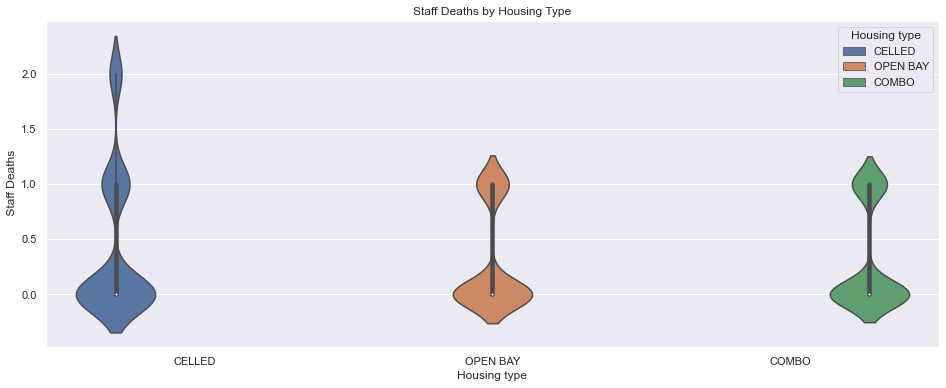

In [7]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="Housing type", y=" Staff Deaths", hue="Housing type", data=df)
plt.title("Staff Deaths by Housing Type")

fig = ax.get_figure()
fig.savefig(CURRENT_DIR / "stf_dths_by_house.png")

In [8]:
df["N_avg"] = (df.N1 + df.N2) / 2

In [9]:
# calculate spearman's correlation
coef, p = spearmanr(df[["N_avg"]], df["# of Currently Positive Staff"], nan_policy="omit")
print(f'Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.544


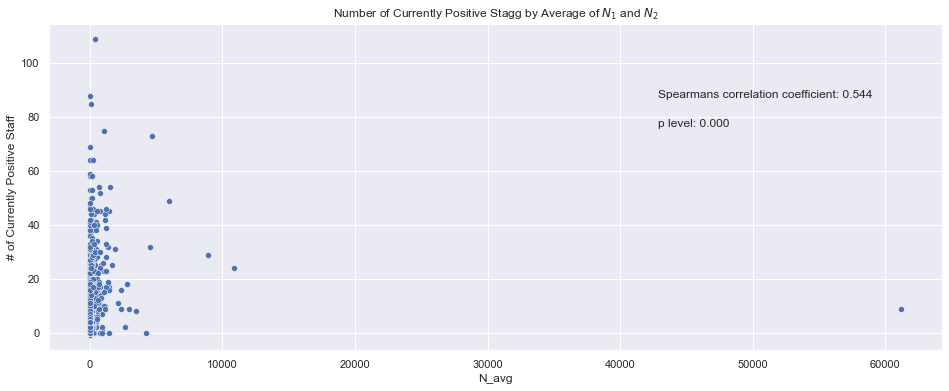

In [10]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="N_avg", y="# of Currently Positive Staff", data=df)
plt.text(.7 * df.N_avg.max(), .8 * df["# of Currently Positive Staff"].max(), f'Spearmans correlation coefficient: %.3f' % coef)
plt.text(.7 * df.N_avg.max(), .7 * df["# of Currently Positive Staff"].max(), f'p level: %.3f' % p)
plt.title("Number of Currently Positive Stagg by Average of $N_1$ and $N_2$")

fig = ax.get_figure()
fig.savefig(CURRENT_DIR / "N_avg_by_pos_stf.png")